In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical


In [2]:
# Load MNIST dataset (Handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing: Rescale images and flatten them for ANN
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the ANN model
def build_ann():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

ann_model = build_ann()

# Train the ANN
history_ann = ann_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the ANN model
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test, y_test)
print(f"ANN Test Accuracy: {ann_test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8333 - loss: 0.5713 - val_accuracy: 0.9537 - val_loss: 0.1623
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9482 - loss: 0.1775 - val_accuracy: 0.9639 - val_loss: 0.1172
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9637 - loss: 0.1246 - val_accuracy: 0.9709 - val_loss: 0.0974
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9715 - loss: 0.0972 - val_accuracy: 0.9747 - val_loss: 0.0812
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9739 - loss: 0.0837 - val_accuracy: 0.9746 - val_loss: 0.0794
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9767 - loss: 0.0728 - val_accuracy: 0.9768 - val_loss: 0.0712
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9810 - loss: 0.0630 - val_accuracy: 0.9803 - val_loss: 0.0689
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9825 - loss: 0.0568 - val_accuracy: 0.

In [3]:
# Load CIFAR-10 dataset (colored images)
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Preprocessing: Rescale images and convert labels to categorical
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

# Build the CNN model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()

# Train the CNN
history_cnn = cnn_model.fit(x_train_cifar, y_train_cifar, epochs=10, batch_size=64, validation_data=(x_test_cifar, y_test_cifar))

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cifar, y_test_cifar)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 85ms/step - accuracy: 0.3303 - loss: 1.8195 - val_accuracy: 0.5282 - val_loss: 1.3077
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5371 - loss: 1.2851 - val_accuracy: 0.5711 - val_loss: 1.1918
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6069 - loss: 1.1170 - val_accuracy: 0.6251 - val_loss: 1.0524
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6436 - loss: 1.0162 - val_accuracy: 0.6249 - val_loss: 1.0505
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.6634 - loss: 0.9618 - val_accuracy: 0.6262 - val_loss: 1.0592
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6844 - loss: 0.9057 - val_accuracy: 0.6736 - val_loss: 0.9470
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.7056 - loss: 0.8500 - val_accuracy: 0.6920 - val_loss: 0.8959
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.7152 - loss: 0.8161 - 

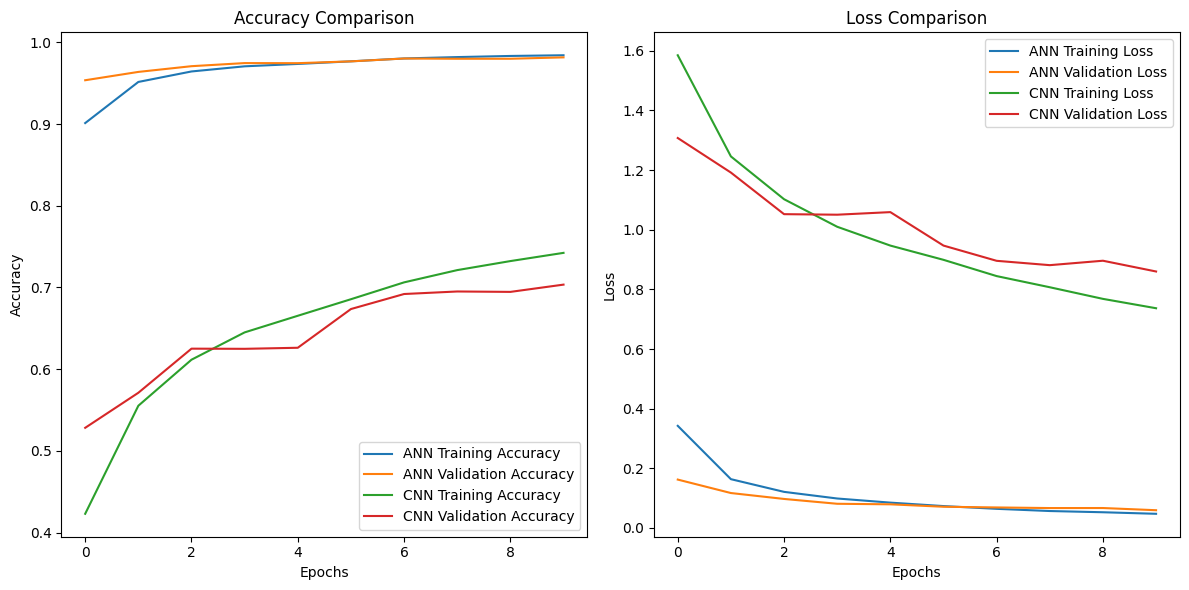

In [4]:
# Plot the accuracy curves for ANN and CNN
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='ANN Training Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Validation Loss')
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
